# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import time

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Data Preprocessing

## Load Data

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_1/train.csv', sep = ',')
test_df  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_1/test.csv', sep = ',')

In [ ]:
train_col = train_df['x']
test_col  = train_df['x']

## Split the data

In [ ]:
n = len(train_df)

train_data = train_col[0          : int(n*0.8)].to_numpy()
valid_data = train_col[int(n*0.8) :           ].to_numpy()

test_data  = test_col.to_numpy()

## Min Max scale

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))

sv = scaler.fit_transform(train_data.reshape(-1, 1))
sv = np.reshape(sv, len(sv))
train = sv

sv = scaler.transform(valid_data.reshape(-1, 1))
sv = np.reshape(sv, len(sv))
valid = sv

sv = scaler.transform(test_data.reshape(-1, 1))
sv = np.reshape(sv, len(sv))
test = sv

In [ ]:
train = train.reshape((train.shape[0], 1))
valid = valid.reshape((valid.shape[0], 1))
test  = test.reshape((test.shape[0]  , 1))

# Split Function

In [ ]:
def split(data, win_size=30, win_shift=6, offset=1):

  rows = np.arange(win_size, len(data) - win_shift - 1, win_shift)

  samples = np.zeros((len(rows), win_size, data.shape[-1]))
  targets = np.zeros((len(rows),))

  for j, row in enumerate(rows):
    samples[j] = data[j * win_shift: row]
    targets[j] = data[row: row + offset]

  return samples, targets

# Shifting

In [ ]:
shifts = np.arange(0,48,3)

In [ ]:
shifts[0] = 1

In [ ]:
shifts

array([ 1,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45])

In [ ]:
mae_shft = []

for index, shft in enumerate(shifts):
  
  print(index)

  # Data
  x_train, y_train = split(train, win_shift=shft)
  x_valid, y_valid = split(valid, win_shift=shft)
  x_test , y_test  = split(test , win_shift=shft)

  seq_len  = x_train.shape[1]
  num_feat = x_train.shape[2]



  # Model - Training
  lstm = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(16, input_shape = (seq_len, num_feat), return_sequences=True),
      tf.keras.layers.LSTM(8),
      tf.keras.layers.Dense(1, activation='tanh')
  ])

  lstm.compile(loss = 'mae', optimizer='adam')
  history = lstm.fit(x_train, y_train, epochs=40, validation_data=(x_valid, y_valid), verbose=0, batch_size=32, shuffle=False)
  


  # Testing
  
  # make prediction
  prediction_lstm = lstm.predict(x_test)

  # revert scaling
  y_test = y_test.reshape((y_test.shape[0], 1))

  y_test          = scaler.inverse_transform(y_test)
  prediction_lstm = scaler.inverse_transform(prediction_lstm)

  # determine mae
  y_test          = y_test.reshape((y_test.shape[0]))
  prediction_lstm = prediction_lstm.reshape((prediction_lstm.shape[0]))

  mae = mean_absolute_error(prediction_lstm, y_test)
  mae_shft.append(mae)

  print(f"Mean Absolute Error Autoencoder axes : {mae}")
  print("\n")

0
Mean Absolute Error Autoencoder axes : 54.362723736851486


1
Mean Absolute Error Autoencoder axes : 61.46328047089751


2
Mean Absolute Error Autoencoder axes : 57.684350843705246


3
Mean Absolute Error Autoencoder axes : 57.920897950092154


4
Mean Absolute Error Autoencoder axes : 55.09455071065683


5
Mean Absolute Error Autoencoder axes : 54.763049289767764


6
Mean Absolute Error Autoencoder axes : 54.615677604694326


7
Mean Absolute Error Autoencoder axes : 58.27555222247632


8
Mean Absolute Error Autoencoder axes : 57.29019260364156


9
Mean Absolute Error Autoencoder axes : 60.712786189834034


10
Mean Absolute Error Autoencoder axes : 56.14132316190064


11
Mean Absolute Error Autoencoder axes : 59.64329197292719


12
Mean Absolute Error Autoencoder axes : 55.21662165839262


13
Mean Absolute Error Autoencoder axes : 60.44917731677966


14
Mean Absolute Error Autoencoder axes : 58.57988747010787


15
Mean Absolute Error Autoencoder axes : 53.862256499746266




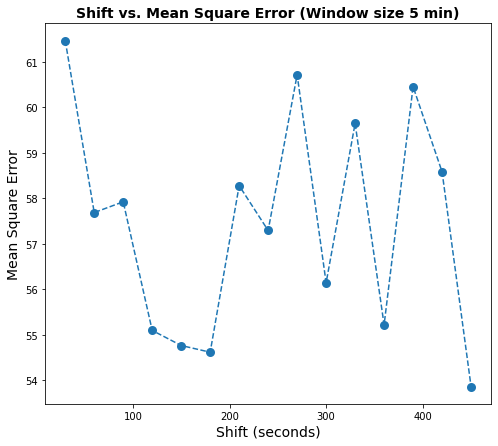

In [2]:
t = np.arange(30,480,30)
mae = [
       61.46328047089751, 
       57.684350843705246, 
       57.920897950092154, 
       55.09455071065683, 
       54.763049289767764, 
       54.615677604694326, 
       58.27555222247632, 
       57.29019260364156, 
       60.712786189834034, 
       56.14132316190064, 
       59.64329197292719, 
       55.21662165839262, 
       60.44917731677966, 
       58.57988747010787, 
       53.862256499746266
      ]

plt.figure(figsize=(8,7))
plt.scatter(t, mae, lw=3)
plt.plot(t, mae, ls='--')
plt.title('Shift vs. Mean Square Error (Window size 5 min)', size=14, fontweight="bold")
plt.xlabel('Shift (seconds)', size=14)
plt.ylabel('Mean Square Error', size=14)
plt.show()